In [1]:
# -*- coding:utf-8 -*-
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.optim as optim

### Load the data

# First we load the entire CSV file into an m x 3
D = torch.tensor(pd.read_csv("linreg-multi-synthetic-2.csv", header=None).values, dtype=torch.float)

# We extract all rows and the first 2 columns, and then transpose it
x_dataset = D[:, 0:2].t()

# We extract all rows and the last column, and transpose it
y_dataset = D[:, 2].t()

# And make a convenient variable to remember the number of input columns
n = 2

In [2]:
### Model definition ###

# First we define the trainable parameters A and b
A = torch.randn((1, n), requires_grad=True)
b = torch.randn(1, requires_grad=True)

# Then we define the prediction model
def model(x_input):
    return A.mm(x_input) + b


### Loss function definition ###

def loss(y_predicted, y_target):
    return ((y_predicted - y_target)**2).sum()

In [3]:
### Training the model ###

# Setup the optimizer object, so it optimizes a and b.
optimizer = optim.Adam([A, b], lr=0.1)

# Main optimization loop
for t in range(2000):
    # Set the gradients to 0.
    optimizer.zero_grad()
    # Compute the current predicted y's from x_dataset
    y_predicted = model(x_dataset)
    # See how far off the prediction is
    current_loss = loss(y_predicted, y_dataset)
    # Compute the gradient of the loss with respect to A and b.
    current_loss.backward()
    # Update A and b accordingly.
    optimizer.step()
    print(f"t = {t}, loss = {current_loss}, A = {A.detach().numpy()}, b = {b.item()}")

t = 0, loss = 116510080.0, A = [[ 0.92661154 -1.591268  ]], b = -0.23714858293533325
t = 1, loss = 106759968.0, A = [[ 1.0264583 -1.4914029]], b = -0.1372900903224945
t = 2, loss = 97463696.0, A = [[ 1.1260384 -1.3917711]], b = -0.0376768633723259
t = 3, loss = 88628464.0, A = [[ 1.2252302 -1.2924775]], b = 0.06158016622066498
t = 4, loss = 80260240.0, A = [[ 1.3239028 -1.1936338]], b = 0.1603625863790512
t = 5, loss = 72363616.0, A = [[ 1.4219165 -1.0953583]], b = 0.25854453444480896
t = 6, loss = 64941688.0, A = [[ 1.5191219 -0.9977757]], b = 0.3559926152229309
t = 7, loss = 57995904.0, A = [[ 1.6153606  -0.90101737]], b = 0.4525660276412964
t = 8, loss = 51525936.0, A = [[ 1.710465 -0.805221]], b = 0.5481166839599609
t = 9, loss = 45529536.0, A = [[ 1.8042581 -0.7105303]], b = 0.6424894332885742
t = 10, loss = 40002464.0, A = [[ 1.8965547 -0.6170943]], b = 0.7355226874351501
t = 11, loss = 34938340.0, A = [[ 1.9871613 -0.5250673]], b = 0.8270487785339355
t = 12, loss = 30328608.0, A

In [4]:
# sample 2
# https://www.kaggle.com/code/joseguzman/multiple-regression-explained-with-pytorch/notebook
%pylab inline
%matplotlib inline
from matplotlib.pyplot import style
style.use('https://raw.githubusercontent.com/JoseGuzman/minibrain/master/minibrain/paper.mplstyle')
import pandas as pd
import numpy as np
data = pd.read_csv('./Advertising.csv', index_col=0)
#data = pd.read_csv('Advertising.csv', index_col=0)
data.head()
print(f'The dataset contains {data.shape[0]} observations')

Populating the interactive namespace from numpy and matplotlib
The dataset contains 200 observations


Intercept  7.03, slope  0.05
Intercept  9.31, slope  0.20
Intercept 12.35, slope  0.05


D:\ProgramData\Anaconda3\envs\TensorFlow_work\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
D:\ProgramData\Anaconda3\envs\TensorFlow_work\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
D:\ProgramData\Anaconda3\envs\TensorFlow_work\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


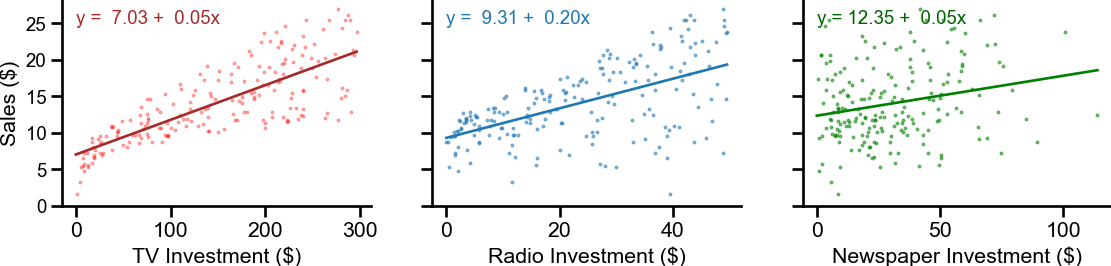

In [5]:
# Simple linear regression with sklearn
from sklearn.linear_model import LinearRegression
LRmodel = LinearRegression() # y = b + wX
sales = data.Sales # dependent variable

# Plot the linear regression for every single independent variable
fig, ax = plt.subplots(1,3, figsize=(12,3), sharey=True)
fig.tight_layout()

# tv is TV investment is a column vector
tv = data.loc[:,['TV']]

LRmodel.fit(tv, sales)

ax[0].scatter(tv,sales, s=4, c='red', alpha = 0.3)
x = np.linspace(0, tv.max(), num = 200)
ax[0].plot(x, LRmodel.predict(x), color = 'brown')
ax[0].set_xlabel('TV Investment ($)'), ax[0].set_ylabel('Sales ($)')
print(f'Intercept {LRmodel.intercept_:5.2f}, slope {LRmodel.coef_[0]:5.2f}')
ax[0].text(x = 0, y =25 , s=f'y = {LRmodel.intercept_:5.2f} + {LRmodel.coef_[0]:5.2f}x', color='brown')

# X is Radio investment
radio = data.loc[:,['Radio']]

LRmodel.fit(radio, sales)

ax[1].scatter(radio,sales, s=4, c='C0', alpha = 0.5)
x = np.linspace(0, radio.max(), num = 200)
ax[1].plot(x, LRmodel.predict(x), color = 'C0')
ax[1].set_xlabel('Radio Investment ($)')
print(f'Intercept {LRmodel.intercept_:5.2f}, slope {LRmodel.coef_[0]:5.2f}')
ax[1].text(x = 0, y =25 , s=f'y = {LRmodel.intercept_:5.2f} + {LRmodel.coef_[0]:5.2f}x', color='C0');

# X is Newspaper investment
news = data.loc[:,['Newspaper']]

LRmodel.fit(news, sales)

ax[2].scatter(news,sales, s=4, c='green', alpha = 0.5)
x = np.linspace(0, news.max(), num = 200)
ax[2].plot(x, LRmodel.predict(x), color = 'green')
ax[2].set_xlabel('Newspaper Investment ($)')
print(f'Intercept {LRmodel.intercept_:5.2f}, slope {LRmodel.coef_[0]:5.2f}')
ax[2].text(x = 0, y =25 , s=f'y = {LRmodel.intercept_:5.2f} + {LRmodel.coef_[0]:5.2f}x', color='darkgreen');


for myax in ax:
    #myax.set_ylabel('Sales ($)')
    myax.set_yticks(np.arange(0,30,5))

In [8]:
# 4.1 Uni-variate simple linear regression
import statsmodels.api as sm
# Simple linear regression with ordinary least squares with statmodels
x = data.loc[:,['TV']] # DataFrame
y = data['Sales']


## fit a OLS model with y = b + w*TV
x = sm.add_constant(x)
est = sm.OLS(y, x).fit()
est.summary()



 y = 7.0326 + 0.04754x


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sun, 06 Nov 2022   Prob (F-statistic):           1.47e-42
Time:                        10:37:08   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
print(f' y = {est.params[0]:2.4f} + {est.params[1]:2.4}x')

 y = 7.0326 + 0.04754x


In [10]:
# 4.2 Multi-variate linear regression
import statsmodels.formula.api as smf

est = smf.ols(formula="Sales ~ TV + Radio + Newspaper", data=data).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sun, 06 Nov 2022   Prob (F-statistic):           1.58e-96
Time:                        10:39:00   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
# 5. Multi-variate linear regression with PyTorch

import torch
import torch.nn as nn
from tqdm import tqdm # progress bar

torch.manual_seed(42); # set seed for reproducibility of results

In [13]:
tv = torch.tensor( data = data.TV.values, dtype = torch.float ) # x_1
radio = torch.tensor( data = data.Radio.values, dtype = torch.float) # x_2
news = torch.tensor( data = data.Newspaper.values, dtype = torch.float) # x_3

sales = torch.tensor( data = data.Sales.values, dtype = torch.float ) # targets

a = torch.randn(1, requires_grad = True)  # start with a random number from a normal distribution
b = torch.randn(1, requires_grad = True)
c = torch.randn(1, requires_grad = True)
d = torch.randn(1, requires_grad = True)

def mylnmodel( tv:torch.Tensor, radio:torch.Tensor, news:torch.Tensor):
    """
    computes f(x; a,b,c) = a + bx_1 + cx_2 + dx_3,
    for independent variables x_1, x_2 and x_3.

    Arguments:
    tv (tensor) with the values of tv investment (x_1)
    radio (tensor) with the values of radio investment (x_2)
    news (tensor) with the newspaper investment (x_3).

    Note: coefficients a, b, c and d must be previoulsy
    defined as tensors with requires_grad = True

    Returns a tensor with the backward() method
    """
    return a + b*tv + c*radio + d*news

In [14]:
predicted = mylnmodel(tv, radio, news)
predicted.shape

torch.Size([200])

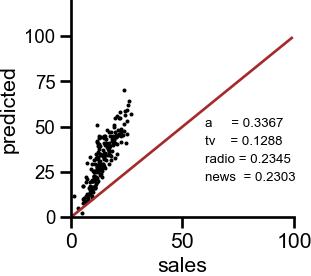

In [15]:
plt.figure(figsize=(3,3))
plt.scatter(sales, predicted.detach(), c='k', s=4)
plt.xlabel('sales'), plt.ylabel('predicted');
x = y = range(100)
plt.plot(x,y, c='brown')
plt.xlim(0,100), plt.ylim(0,120);
plt.text(60,50, f'a     = {a.item():2.4f}', fontsize=10);
plt.text(60,40, f'tv    = {b.item():2.4f}', fontsize=10);
plt.text(60,30, f'radio = {c.item():2.4f}', fontsize=10);
plt.text(60,20, f'news  = {d.item():2.4f}', fontsize=10);

In [18]:
def MSE(y_predicted:torch.Tensor, y_target:torch.Tensor):
    """
    Returns a single value tensor with
    the mean of squared errors (SSE) between the predicted and target
    values:

    """
    error = y_predicted - y_target # element-wise substraction
    return torch.sum(error**2 ) / error.numel() # mean (sum/n)


predicted = mylnmodel(tv,radio,news)
loss = MSE(y_predicted = predicted, y_target=sales)
print(loss) # 401.0395

# initial values for the coefficients is random, gradients are not calculated
print(f'a = {float(a.item()):+2.4f}, df(a)/da = {a.grad}') # 0.3367
print(f'b = {float(b.item()):+2.4f}, df(b)/da = {a.grad}') # 0.1288
print(f'c = {float(c.item()):+2.4f}, df(c)/dc = {c.grad}') # 0.2345
print(f'd = {float(d.item()):+2.4f}, df(d)/dd = {d.grad}') # 0.2303

loss.backward()

# initial values for the coefficients is random, gradients are now calculated
print(f'a = {float(a.item()):+2.4f}, df(a)/da = {a.grad}') # 0.3367
print(f'b = {float(b.item()):+2.4f}, df(b)/da = {a.grad}') # 0.1288
print(f'c = {float(c.item()):+2.4f}, df(c)/dc = {c.grad}') # 0.2345
print(f'd = {float(d.item()):+2.4f}, df(d)/dd = {d.grad}') # 0.2303

tensor(401.0395, grad_fn=<DivBackward0>)
a = +0.3367, df(a)/da = None
b = +0.1288, df(b)/da = None
c = +0.2345, df(c)/dc = None
d = +0.2303, df(d)/dd = None
a = +0.3367, df(a)/da = tensor([35.4936])
b = +0.1288, df(b)/da = tensor([35.4936])
c = +0.2345, df(c)/dc = tensor([910.1332])
d = +0.2303, df(d)/dd = tensor([1330.8242])


100%|██████████| 5000/5000 [00:01<00:00, 4333.05it/s]


(Text(0.5, 0, 'Epoch (#)'), Text(0, 0.5, 'Mean squared Errors'))

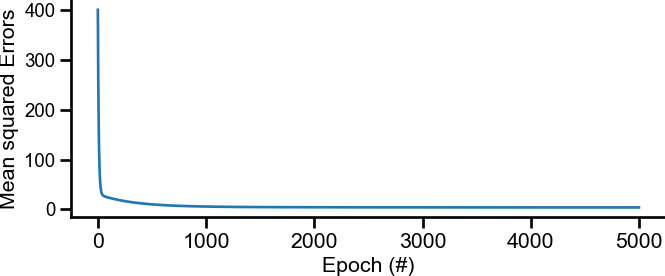

In [19]:
myMSE = list()
for i in tqdm(range(5_000)):
    a.grad.zero_()
    b.grad.zero_()
    c.grad.zero_()
    d.grad.zero_()

    predicted = mylnmodel(tv,radio,news) # forward pass (compute results)
    loss = MSE(y_predicted = predicted, y_target = sales) # calculate MSE

    loss.backward() # compute gradients
    myMSE.append(loss.item()) # append loss
    with torch.no_grad():
        a -= a.grad * 1e-6
        b -= b.grad * 1e-6
        c -= c.grad * 1e-6
        d -= d.grad * 1e-6

plt.plot(myMSE);
plt.xlabel('Epoch (#)'), plt.ylabel('Mean squared Errors')

Text(25, 6, 'news  = 0.0216')

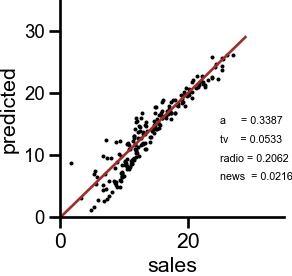

In [20]:
plt.figure(figsize=(3,3))
plt.scatter(sales, predicted.detach(), c='k', s=4)
plt.xlabel('sales'), plt.ylabel('predicted');
x = y = range(30)
plt.plot(x,y, c='brown')
plt.xlim(0,35), plt.ylim(0,35);
plt.text(25, 15, f'a     = {a.item():2.4f}', fontsize=8)
plt.text(25, 12, f'tv    = {b.item():2.4f}', fontsize=8)
plt.text(25, 9,  f'radio = {c.item():2.4f}', fontsize=8)
plt.text(25, 6,  f'news  = {d.item():2.4f}', fontsize=8)
#plt.text(25, 12, f'tv = {mymodel.w[0].item():2.4f}', fontsize=8)
#plt.text(25, 9, f'radio = {mymodel.w[1].item():2.4f}', fontsize=8)
#plt.text(25, 6, f'newspaper = {mymodel.w[2].item():2.4f}', fontsize=8)

In [49]:
# 5.1 Redefine multi-variable linear operation in matrix form
torch.manual_seed(42) # set the seed againg just in case you modified previous cells.
# independent variables (X) and dependent variable (y)
X = torch.tensor(data.loc[:,['TV','Radio','Newspaper']].values)
y = torch.tensor(data.Sales.values)
X.shape

torch.Size([200, 3])

In [50]:
w = torch.rand(3, dtype=torch.double, requires_grad = True)
b = torch.rand(1, dtype=torch.double, requires_grad = True)
w, b

(tensor([0.0582, 0.0629, 0.1236], dtype=torch.float64, requires_grad=True),
 tensor([0.0526], dtype=torch.float64, requires_grad=True))

In [51]:
def model(X:torch.Tensor):
    """
    Performs the matrix vector multiplication
    """
    assert len(X.shape) == 2
    return X @ w.T + b

predicted = model(X)
loss = MSE(y_predicted = predicted, y_target=y)
print(loss) # www.1422

tensor(11.2748, dtype=torch.float64, grad_fn=<DivBackward0>)


In [52]:
## Use gradiendt descent
# myMSE = list()
# for i in tqdm(range(10_000)):
#
#
#     predicted = model(X) # forward pass (compute results)
#     loss = MSE(y_predicted = predicted, y_target = y) # calculate MSE
#
#     loss.backward() # compute gradients
#     myMSE.append(loss.detach().numpy()) # append loss
#     with torch.no_grad():
#         w -= w.grad * 1e-6
#         b -= b.grad * 1e-6
#     w.grad.zero_()
#     b.grad.zero_()
#
#
# plt.plot(myMSE)
# plt.xlabel('Epoch (#)'), plt.ylabel('Mean squared Errors')

100%|██████████| 5000/5000 [00:01<00:00, 3753.55it/s]


(Text(0.5, 0, 'Epoch (#)'), Text(0, 0.5, 'Mean squared Errors'))

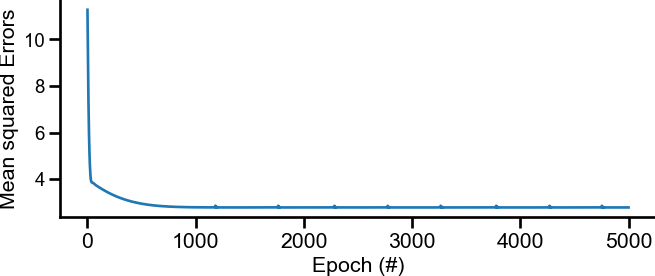

In [53]:
myoptimizer = torch.optim.Adam(params = [b,w], lr = 0.005)
myMSE = list()
for epoch in tqdm(range(5_000)):
    myoptimizer.zero_grad() # 1. Set gradients to zero
    predicted = model(X) # 2. compute prediction
    loss = MSE(y_predicted = predicted, y_target = y) # 3. compute MSE
    myMSE.append(loss.detach().numpy())
    loss.backward() # 4. compute the gradient based on previous
    myoptimizer.step() # 5. myoptimizer updates parameters
    #print(f'epoch = {epoch:02d}, loss = {current_loss}, a = {w}, b = {b}') # 6.

plt.plot(myMSE);
plt.xlabel('Epoch (#)'), plt.ylabel('Mean squared Errors')

In [54]:
w,b

(tensor([ 0.0458,  0.1885, -0.0010], dtype=torch.float64, requires_grad=True),
 tensor([2.9389], dtype=torch.float64, requires_grad=True))